In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import_libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import pathlib
import importlib
from numpy import arange,array,ones
from scipy import stats
from scipy.interpolate import *
import statistics as st
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from sklearn import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import *

#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from sklearn.ensemble import *
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import RandomForestRegressor

from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn import svm
from sklearn.svm import SVR

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [0]:
##input for ML
filename = '/content/drive/My Drive/Colab Notebooks/GaBP2/New_Material_Predict/descriptor_ABX2.csv'
drop_column = ['Compound','volume']
target_header = 'Volume'
dataset = pd.read_csv(filename)
dataset


,compound,AM1,AN1,Period1,group1,First_IE1,Second_IE1,elctron_AF1,paulielctrneg1,Allen_electneg1,vand_rad1,cov_rad1,atom_rad1,metling1,boiling1,density1,molarVol1,heat_fus1,heat_vap1,thermal_con1,spec_heat1,AM2,AN2,Period2,group2,First_IE21,Second_IE12,elctron_AF2,paulielctrneg2,Allen_electneg2,vand_rad2,cov_rad2,atom_rad2,metling2,boiling2,density2,molarVol2,heat_fus2,heat_vap2,thermal_con2,spec_heat2,AM3,AN3,Period3,group3,First_IE3,Second_IE3,elctron_AF3,paulielctrneg3,Allen_electneg3,vand_rad3,cov_rad3,atom_rad3,metling3,boiling3,density3,molarVol3,heat_fus3,heat_vap3,thermal_con3,spec_heat3,ST,KT,CP,BandGap,Ksgap,Volume,product
0,ZnGeN2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.994,211,120,125,938.30,2833,5.323,0.000014,31.80,334,0.599,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,1,0,0,2.44,1.76,181.389,1039440
1,ZnGeN2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.994,211,120,125,938.30,2833,5.323,0.000014,31.80,334,0.599,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,0,1,0,3.02,2.15,181.833,1039440
2,ZnGeN2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,72.64,32,4,14,762.0,1537.5,-118.9,2.01,1.994,211,120,125,938.30,2833,5.323,0.000014,31.80,334,0.599,321.4,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,0,0,1,2.73,1.95,181.565,1039440
3,AlGaN2,26.981,13,3,13,577.5,1816.7,-41.8,1.61,1.613,184,121,125,660.30,2470,2.6989,0.000010,10.70,293,2.370,904,69.72,31,4,13,578.8,1979.3,-40.0,1.81,1.756,187,122,130,29.76,2400,5.910,0.000012,5.59,256,0.406,371.0,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,1,0,0,4.59,3.28,178.460,1048102
4,AlGaN2,26.981,13,3,13,577.5,1816.7,-41.8,1.61,1.613,184,121,125,660.30,2470,2.6989,0.000010,10.70,293,2.370,904,69.72,31,4,13,578.8,1979.3,-40.0,1.81,1.756,187,122,130,29.76,2400,5.910,0.000012,5.59,256,0.406,371.0,14.01,7,2,15,1402.3,2856.0,0.07,3.04,3.066,155,71,65,-210.10,-195.8,0.808,0.011197,0.36,2.79,0.00026,1040.0,0,1,0,4.63,3.31,178.365,1048102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,ZnSnSb2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290,0.666,217.0,121.80,51,5,15,834.0,1594.9,-101.00,2.05,1.984,206,139,145,630.63,1635.0,6.690,0.000018,19.70,67.00,0.24300,207.0,0,1,0,0.05,0.04,493.833,2357162
95,ZnSnSb2,65.390,30,4,12,906.4,1733.3,0.0,1.65,1.590,139,122,135,419.53,907,7.1330,0.000009,7.35,119,1.160,388,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290,0.666,217.0,121.80,51,5,15,834.0,1594.9,-101.00,2.05,1.984,206,139,145,630.63,1635.0,6.690,0.000018,19.70,67.00,0.24300,207.0,0,0,1,0.04,0.03,494.125,2357162
96,CdSnSb2,112.400,48,5,12,867.8,1631.4,70.0,1.69,1.520,158,144,155,321.07,767,8.6500,0.000013,6.30,100,0.968,230,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290,0.666,217.0,121.80,51,5,15,834.0,1594.9,-101.00,2.05,1.984,206,139,145,630.63,1635.0,6.690,0.000018,19.70,67.00,0.24300,207.0,1,0,0,0.06,0.04,544.101,2782224
97,CdSnSb2,112.400,48,5,12,867.8,1631.4,70.0,1.69,1.520,158,144,155,321.07,767,8.6500,0.000013,6.30,100,0.968,230,118.70,50,5,14,708.6,1411.8,-107.0,1.96,1.824,217,139,145,231.93,2602,7.310,0.000016,7.00,290

In [0]:
testing_data_fraction = 0.25
no_of_cross_validation = 100 #minimum accepted value is 2
random_state = 25  #some random number
#model = LinearRegression(fit_intercept=True)
model = Lasso(alpha=0.01,max_iter=100)

In [0]:
data_file =filename
dataset = pd.read_csv(data_file)
### ## preprocessing of data
### check if any data  is missing
try:
 dataset.isna().sum()
except:
 dataset.isnull().sum()
### remove the line with missing data if any  
dataset = dataset.dropna()
#Remove the column with only text  and target column in X_1 by using their header
X_1 = dataset[['cov_rad1','cov_rad2','cov_rad3']]
X=X_1
#mention the column header of target here
Y = dataset[target_header]
###splitting the training and testing data here
testing_data_fraction = testing_data_fraction
for n in range (1,no_of_cross_validation,1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testing_data_fraction, random_state=n)
##################################################################################################
### importing models from model input.txt here
    model=model
    model.fit(X_train, Y_train)
    ### ## model evaluation for training and testing set
    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    y_test_predict = model.predict(X_test)
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2_test = r2_score(Y_test, y_test_predict)

##########################################################################################################
### saving the rmse and r^2 for each n values in the file 'cross-validation-out.csv' and statistics in the file "stat-results.csv"

    with open('out.csv', mode='a') as out_file:
      out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      out_writer.writerow(['%s' %n, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
      out_file.close()

from shutil import copyfile
copyfile('out.csv', 'cross-validation-out.csv')

###here we import the out.csv file and printthe statistics
data_stat=pd.read_csv('out.csv',  names = ["RMSE-Train", "R^square train", "RMSE-test", "R^square test"])
print(data_stat.describe()) 
data_stat.describe().to_csv("stat-results.csv")
#Removing out.csv file
try:
    os.remove("out.csv")
except OSError:
    pass


       RMSE-Train  R^square train  RMSE-test  R^square test
count   99.000000       99.000000  99.000000      99.000000
mean     6.082284        0.996455   6.331901       0.995997
std      0.251555        0.000246   0.785045       0.000839
min      5.540397        0.995851   4.432633       0.993232
25%      5.935736        0.996293   5.815691       0.995562
50%      6.095968        0.996467   6.330163       0.996065
75%      6.256541        0.996614   6.791863       0.996565
max      6.606183        0.997043   7.979188       0.998058


In [0]:
### This section of the script is for an individual random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testing_data_fraction, random_state=random_state)
#####Define the regression model here
model = model
model.fit(X_train, Y_train)
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE of Training is {}'.format(rmse))
print('R2 score of Training set is {}'.format(r2))
#####################################################
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is Testing is {}'.format(rmse_test))
print('R2 score of Testing is {}'.format(r2_test))
#print (Y_test,y_test_predict)
print("model intercept is", model.intercept_)

The model performance for training set
--------------------------------------
RMSE of Training is 5.671845034090499
R2 score of Training set is 0.996854313262175
The model performance for testing set
--------------------------------------
RMSE is Testing is 7.447329904426204
R2 score of Testing is 0.9948978276510436
model intercept is -573.1672959096627


In [0]:
#please mention data file name here
filename1 ='/content/drive/My Drive/Colab Notebooks/GaBP2/New_Material_Predict/New_descrptor.csv' 
dataset1 = pd.read_csv(filename1)
dataset1

,Compound,AM2,AM3,rcov1,rcov2,rcov3,AEN2,FIE3,HeatFusion3,molar_volume3
0,B Al N2,26.981,14.01,82,121,71,1.613,1402.3,0.36,0.011197
1,B GaN2,69.720,14.01,82,122,71,1.756,1402.3,0.36,0.011197
2,B In N2,114.800,14.01,82,142,71,1.656,1402.3,0.36,0.011197
3,B Al P2,26.981,30.97,82,121,107,1.613,1011.8,0.64,0.000017
4,B Ga P2,69.720,30.97,82,122,107,1.756,1011.8,0.64,0.000017
5,B In P2,114.800,30.97,82,142,107,1.656,1011.8,0.64,0.000017
6,B Al As2,26.981,74.92,82,121,119,1.613,947.0,27.70,0.000013
7,B GaAs2,69.720,74.92,82,122,119,1.756,947.0,27.70,0.000013
8,B In As2,114.800,74.92,82,142,119,1.656,947.0,27.70,0.000013
9,B Al Sb2,26.981,121.80,82,121,139,1.613,834.0,19.70,0.000018


In [0]:
###for a new set of data model prediction
X_New= pd.read_csv('/content/drive/My Drive/Colab Notebooks/GaBP2/New_Material_Predict/New_descrptor.csv')
X_new = X_New[['rcov1','rcov2','rcov3']]
y_new = model.predict(X_new)
print("X=%s, Predicted=%s" % (X_new, y_new.T))

X=    rcov1  rcov2  rcov3
0      82    121     71
1      82    122     71
2      82    142     71
3      82    121    107
4      82    122    107
5      82    142    107
6      82    121    119
7      82    122    119
8      82    142    119
9      82    121    139
10     82    122    139
11     82    142    139
12    121     82     71
13    122     82     71
14    142     82     71
15    121     82    119
16    122     82    119
17    142     82    119
18    121     82    107
19    122     82    107
20    142     82    107
21    121     82    139
22    122     82    139
23    142     82    139, Predicted=[103.08164176 105.08105459 145.06931122 250.07813458 252.07754741
 292.06580404 299.07696552 301.07637836 341.06463498 380.74168376
 382.74109659 422.72935322  93.78745814  95.54855857 130.77056719
 289.78278191 291.54388234 326.76589096 240.78395096 242.5450514
 277.76706001 371.44750014 373.20860057 408.43060919]


In [0]:
######printing coefficient of the regression
try:
#    print ("The Dual coefficients are", np.vstack(model.dual_coef_))
#    coefficient = np.vstack(model.dual_coef_)
    coefficient = model.dual_coef_
    print(coefficient)
#    print(X_1.columns.values.tolist())
    print ("The dual coefficients are written in the file 'dual_coef.txt'")
    with open('dual_coef.txt', mode='a') as out_file:
      out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      out_writer.writerow([X_1.columns.values.tolist()])
      out_writer.writerow([coefficient])
      out_file.close()
except AttributeError:
    pass
try:
#    print ("The model coefficients are {}", np.vstack(model.coef_))
#    coefficient = np.vstack(model.coef_)
    coefficient = model.coef_
except AttributeError:
    pass
try:
 #   print ("The model coefficients are", np.vstack(model.feature_importances_))
#    coefficient = np.vstack(model.feature_importances_)
    coefficient = model.feature_importances_
except AttributeError:
    pass

try:
    os.remove("co-efficient-out.txt")
except OSError:
    pass
try:
    feature={'features name': X_1.columns.values.tolist(),
      'coefficient':coefficient}
    df_feature=pd.DataFrame(feature)
    print(df_feature)
    df_feature.to_csv("Feature_vs_coeff.csv")
    print ("Features and their respective Coefficients are written in the file 'Feature_vs_coeff.csv'")
except:
  print ("-------------------------------------------------------------------------------------------")
  print ("-------------------------------------------------------------------------------------------")
  print ("No Coefficient(s) saved for this model")
  pass

  features name  coefficient
0      cov_rad1     1.761100
1      cov_rad2     1.999413
2      cov_rad3     4.083236
Features and their respective Coefficients are written in the file 'Feature_vs_coeff.csv'


In [0]:
print(model.intercept_)

-573.1672959096627


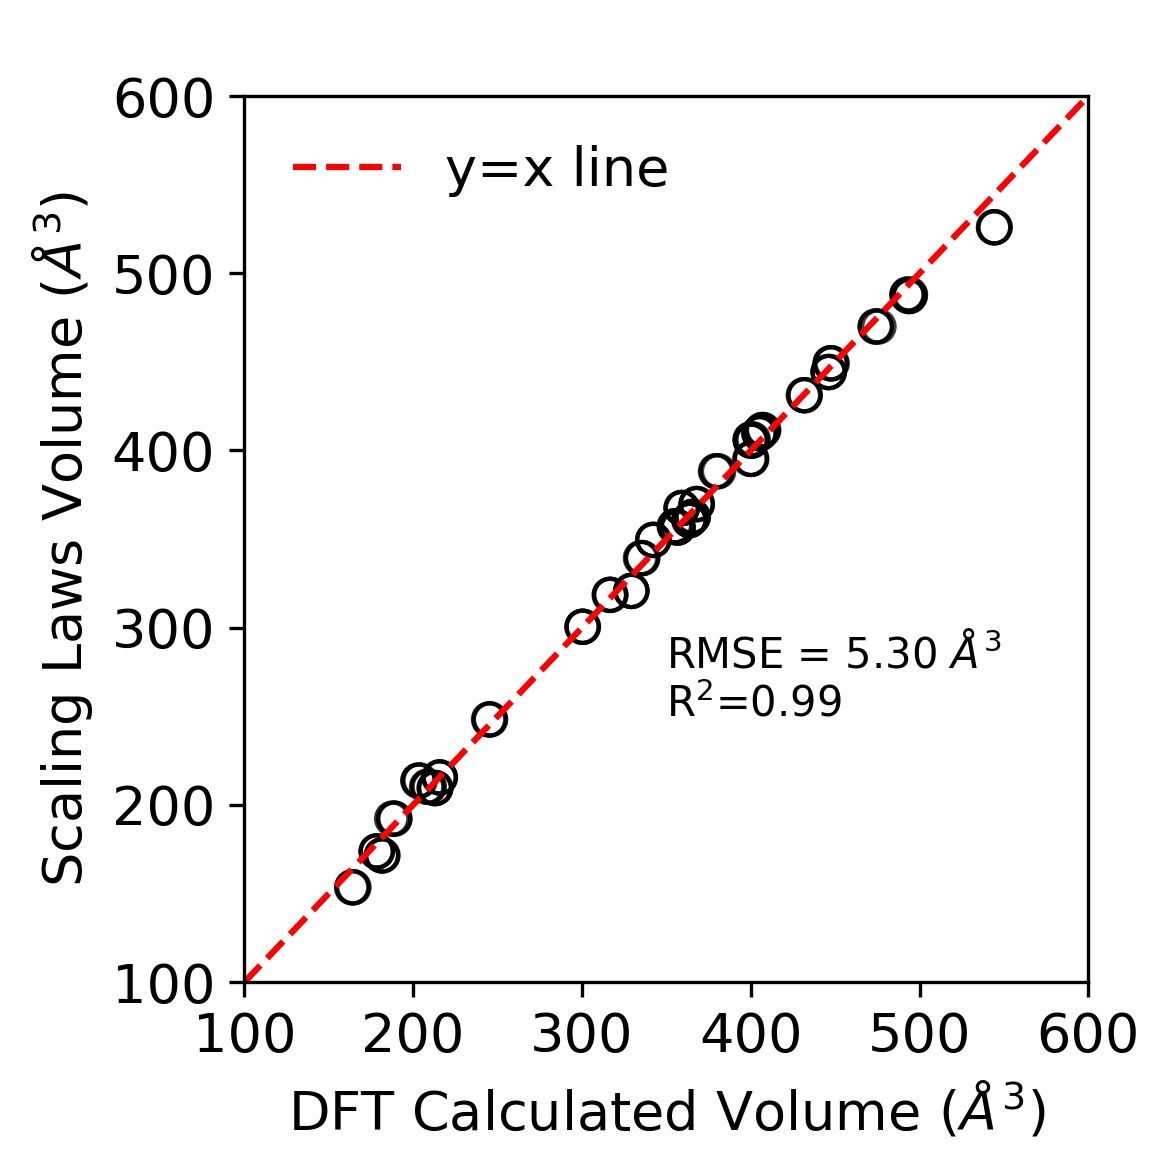

<Figure size 432x288 with 0 Axes>

In [0]:
###matplotlib_input
header=" "
fig_size1 = 4
fig_size2 = 4
dpi = 300
x_min = 100
x_max = 600
y_min = 100
y_max = 600
legend_location = 2
x_label = 'DFT Calculated Volume $(\AA^{3})$'
y_label = 'Scaling Laws Volume $(\AA^{3})$'
out_fig_name_and_format = 'volume_test.eps'
#### define your data plot here
plt.figure(figsize=(fig_size1,fig_size2),dpi=dpi)
plt.title(header, fontsize=13)
plt.xlim((x_min,x_max))
plt.xticks(np.linspace(x_min,x_max,6,endpoint=True))
plt.ylim((y_min,y_max))
plt.yticks(np.linspace(x_min,x_max,6,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='',facecolors='', alpha=0.80, edgecolors='k', s=60, marker='o')
plt.scatter(Y_test, y_test_predict, label='',facecolors='', alpha=0.75, edgecolors='k',s=60, marker='o')
#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.xlabel(x_label,fontsize=13)
plt.ylabel(y_label,fontsize=13)
#####fitting with a y=x line here (polynomial approach)
plt.plot((x_min,x_max),(y_min,y_max), 'r',linestyle='dashed',label='y=x line')
plt.tight_layout()
plt.legend(loc=legend_location, prop={'size': 13}, frameon=False)
#error=round(rmse_test,2)
#plt.text(2.5, 1.5, 'RMSE={}'.format(error), fontsize=13)
plt.text(350.0,250.0, "RMSE = 5.30 $\AA^{3}$" "\n" "R$^2$=0.99")
plt.show()
plt.savefig(out_fig_name_and_format)